# Exciting Stuff

In this notebook you will solve a problem that was posed as follows for CS189 Spring 2017 (with minor modifications): 

"Jordan is planning the frat party of the semester. He’s completely stocked up on Franzia. Unfortunately, the
labels for 497 boxes (test set) have been scratched off, and he needs to quickly find out which boxes contain
Red wine (label 1) and White wine (label 0). Fortunately, for him the boxes still have their Nutrition Facts
(features) intact and detail the chemical composition of the wine inside the boxes (the description of these
features and the features themselves are provided in data.mat). He also has 6,000 boxes with Nutrition
Facts and labels intact (train set). Help Jordan figure out what the labels should be for the 497 mystery boxes."

Dataset creds: Jonathan Shewchuk's CS189 Spring 2017

In [1]:
from scipy.io import loadmat as loadmat
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import math

## Important Functions
Fill these in so that we can perform training. 

In [2]:
def sigmoid(X, w):
    """
    Compute the elementwise sigmoid of the product Xw
    Data in X should be rows, weights are a column. 
    """
    return 1 / (1 + np.exp(-np.dot(X, w)))

def gradient(X, y, w, onept, lamb=0):
    """
    Compute gradient of regularized loss function. 
    Accomodate for if X is just one data point. 
    """
    if onept: 
        return 2 * lamb * w - ((y - sigmoid(X, w)) * X).reshape(w.size, 1)
    return 2 * lamb * w - np.dot(X.T, y - sigmoid(X, w)) / y.size

def loss(X, y, w, lamb=0):
    """
    Compute total loss for the data in X, labels in y, params w
    """
    sumcost = 0
    for i in range(X.shape[0]):
        sumcost += y[i] * np.log(sigmoid(X[i], w)) + (1 - y[i]) * np.log(1 - sigmoid(X[i], w))
    return lamb * np.linalg.norm(w)**2 - sumcost / y.size

def accuracy(X, y, w):
    """
    Compute accuracy for data in X, labels in y, params w
    """
    results = np.round(sigmoid(X, w))
    score = sum([results[i] == y[i] for i in range(y.size)]) / y.size
    return score[0]

## Load in the Data
This procedure uses loading a .mat file. The returned object is a dictionary that has numpy arrays as values. 

In [4]:
winedata = loadmat('data.mat')
winedata.keys()

['X_test', 'description', '__header__', '__globals__', 'y', 'X', '__version__']

## Preprocessing Data
- It's generally a good idea to normalize feature vectors before proceeding further. Why do you suppose this makes sense?  
- Let's also add a bias feature to improve the capacity of our model. 



In [5]:
wineTrain = winedata['X']
wineLabels = winedata['y']

#wineTrain = np.concatenate([wineTrain, np.ones((wineTrain.shape[0], 1))], axis=1)
wineTrain.shape

(6000, 12)

## Batch Gradient Descent
- First instantiate a normalized weight vector.
- Create an empty list of loss values which we will fill and visualize.
- Perform training using the entire dataset for gradient calculations

In [6]:
weights = np.asarray([np.random.rand() for i in range(wineTrain.shape[1])]).reshape(wineTrain.shape[1], 1)
weights /= np.linalg.norm(weights)
losses = []
accuracies = []
epsilon = 0.001
num_iterations = 100

for i in range(100):
    diff = epsilon * gradient(wineTrain, wineLabels, weights, False)
    weights = weights - diff
    losses.append(loss(wineTrain, wineLabels, weights))
    accuracies.append(accuracy(wineTrain, wineLabels, weights))

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:23: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in multiply


## Visualize The Loss 
- Plot loss values with respect to every training step. 
- How can you explain the shape that this graph takes? 

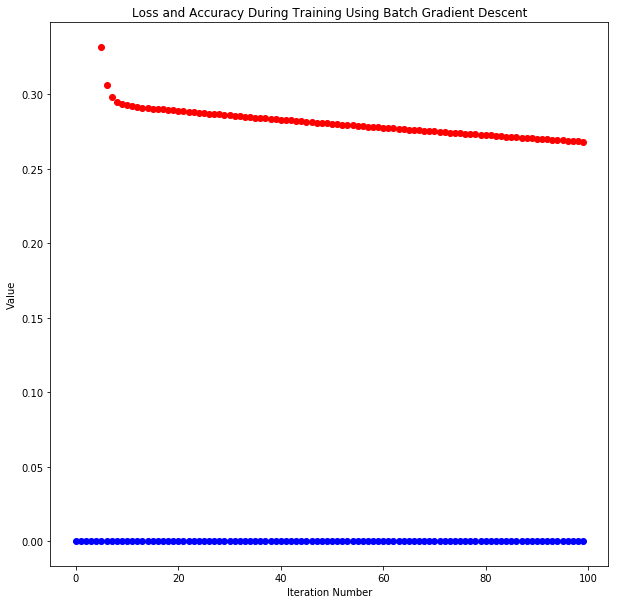

0


In [7]:
plt.figure(figsize=[10,10])
plt.plot(np.arange(num_iterations), losses, 'ro')
plt.plot(np.arange(num_iterations), accuracies, 'bo')
plt.title('Loss and Accuracy During Training Using Batch Gradient Descent')
plt.ylabel('Value')
plt.xlabel('Iteration Number')
plt.show()
print(accuracy(wineTrain, wineLabels, weights))

## Repeat Training Exercise with SGD
- Training with respect to only one point instead of the whole dataset. 
- Plot the losses. Why does the graph take the shape that it does?

In [8]:
sweights = np.asarray([np.random.rand() for i in range(wineTrain.shape[1])]).reshape(wineTrain.shape[1], 1)
sweights /= np.linalg.norm(sweights)
scosts = []
saccuracies = []
epsilon = 0.01

for i in range(40000):
    randpoint = int(wineTrain.shape[0] * np.random.rand())
    diff = epsilon * gradient(wineTrain[randpoint], wineLabels[randpoint], sweights, True)
    sweights = sweights - diff
    if i % 200 == 0:
        scosts.append(loss(wineTrain, wineLabels, sweights))
        saccuracies.append(accuracy(wineTrain, wineLabels, sweights))

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:23: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: overflow encountered in exp


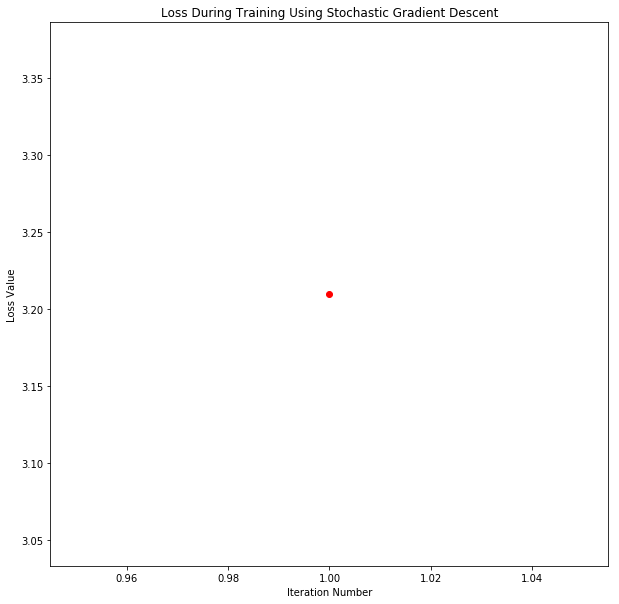

0


In [9]:
plt.figure(figsize=[10,10])
plt.plot(np.arange(200), scosts, 'ro')
plt.title('Loss During Training Using Stochastic Gradient Descent')
plt.ylabel('Loss Value')
plt.xlabel('Iteration Number')
plt.show()
print(accuracy(wineTrain, wineLabels, sweights))

## Trying Different Regularization Constants
- Let's see if we can get better generalization (validation accuracy) with regularization
- Produce bar chart for validation accuracy given a different value of labmda

In [10]:
lambdas = [0, 0.001, 0.01, 0.1, 1, 5, 10, 100]
epsilon = 0.001

num_val_points = int(0.99 * wineTrain.shape[0])
indices = np.arange(wineTrain.shape[0]).astype(int)
np.random.shuffle(indices)
print(indices)

train_data = wineTrain[indices[num_val_points:]]
train_labels = wineLabels[indices[num_val_points:]]
val_data = wineTrain[indices[:num_val_points]]
val_labels = wineLabels[indices[:num_val_points]]


for lamb in lambdas:
    w = np.asarray([np.random.rand() for i in range(13)]).reshape(13, 1)
    w /= np.linalg.norm(w)
    for i in range(1000):
        diff = epsilon * gradient(train_data, train_labels, w, False, lamb)
        w = w - diff
    print(accuracy(train_data, train_labels, w))
    print(accuracy(val_data, val_labels, w))

[4666 5915 2209 ..., 1598 2895 2916]


ValueError: shapes (60,12) and (13,1) not aligned: 12 (dim 1) != 13 (dim 0)